In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Question 4.a
data = pd.read_csv('HW1_asset_prices.csv').set_index('Date')
correlation_matrix = data.corr()
correlation_matrix.head()

,EOD~BND.11,EOD~DBC.11,EOD~DIA.11,EOD~EEM.11,EOD~EFA.11,EOD~EMB.11,EOD~EPP.11,EOD~EWG.11,EOD~EWI.11,EOD~EWJ.11,...,EOD~VGK.11,EOD~VPL.11,EOD~VXX.11,EOD~XLB.11,EOD~XLE.11,EOD~XLF.11,EOD~XLK.11,EOD~XLU.11,EOD~CSJ.11,EOD~FXF.11
EOD~BND.11,1.000000,-0.822062,0.794479,0.069905,0.114368,0.912854,0.119582,0.099310,-0.482615,0.638039,...,-0.037230,0.536324,-0.900317,0.597031,-0.613705,0.689425,0.845532,0.941027,0.934951,-0.769985
EOD~DBC.11,-0.822062,1.000000,-0.574282,0.349666,0.200079,-0.600426,0.325952,0.228763,0.600429,-0.472528,...,0.333239,-0.215966,0.773717,-0.238640,0.895370,-0.509694,-0.644009,-0.717165,-0.713552,0.870505
EOD~DIA.11,0.794479,-0.574282,1.000000,0.468724,0.563945,0.917934,0.519725,0.568437,-0.070294,0.897045,...,0.412195,0.875397,-0.883305,0.898652,-0.346392,0.975872,0.988677,0.910599,0.917660,-0.657030
EOD~EEM.11,0.069905,0.349666,0.468724,1.000000,0.906563,0.383581,0.968244,0.871560,0.609441,0.553773,...,0.872187,0.788827,-0.162012,0.743330,0.522937,0.488016,0.403966,0.239615,0.227668,0.224999
EOD~EFA.11,0.114368,0.200079,0.563945,0.906563,1.000000,0.412868,0.881808,0.961832,0.722791,0.701312,...,0.975473,0.852729,-0.274274,0.759922,0.333035,0.596364,0.504831,0.291689,0.308123,0.135446


In [3]:
#extracts the indices from the correlation matrix, which are the stocks
stocks = correlation_matrix.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
correlation_matrix = np.asmatrix(correlation_matrix)
correlation_matrix

matrix([[ 1.        , -0.82206194,  0.7944792 , ...,  0.94102682,
          0.93495058, -0.76998484],
        [-0.82206194,  1.        , -0.5742816 , ..., -0.71716539,
         -0.71355201,  0.87050482],
        [ 0.7944792 , -0.5742816 ,  1.        , ...,  0.91059853,
          0.91766044, -0.65703029],
        ...,
        [ 0.94102682, -0.71716539,  0.91059853, ...,  1.        ,
          0.96040775, -0.72589881],
        [ 0.93495058, -0.71355201,  0.91766044, ...,  0.96040775,
          1.        , -0.72806496],
        [-0.76998484,  0.87050482, -0.65703029, ..., -0.72589881,
         -0.72806496,  1.        ]])

In [4]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(correlation_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
G.edges(data=True)

EdgeDataView([('EOD~BND.11', 'EOD~BND.11', {'weight': 1.0}), ('EOD~BND.11', 'EOD~DBC.11', {'weight': -0.8220619436026615}), ('EOD~BND.11', 'EOD~DIA.11', {'weight': 0.7944792033336234}), ('EOD~BND.11', 'EOD~EEM.11', {'weight': 0.06990468475524964}), ('EOD~BND.11', 'EOD~EFA.11', {'weight': 0.11436755413278887}), ('EOD~BND.11', 'EOD~EMB.11', {'weight': 0.9128536788357466}), ('EOD~BND.11', 'EOD~EPP.11', {'weight': 0.11958187104281387}), ('EOD~BND.11', 'EOD~EWG.11', {'weight': 0.09931047806248296}), ('EOD~BND.11', 'EOD~EWI.11', {'weight': -0.4826149429941241}), ('EOD~BND.11', 'EOD~EWJ.11', {'weight': 0.6380390720471758}), ('EOD~BND.11', 'EOD~EWQ.11', {'weight': 0.1332984860397909}), ('EOD~BND.11', 'EOD~EWU.11', {'weight': -0.5175970947436056}), ('EOD~BND.11', 'EOD~FXB.11', {'weight': -0.8817178954853515}), ('EOD~BND.11', 'EOD~FXC.11', {'weight': -0.7642072305344217}), ('EOD~BND.11', 'EOD~FXE.11', {'weight': -0.7516055475963472}), ('EOD~BND.11', 'EOD~FXI.11', {'weight': 0.2970784882291008}),

TypeError: draw_networkx_edges() got an unexpected keyword argument 'edge_list'

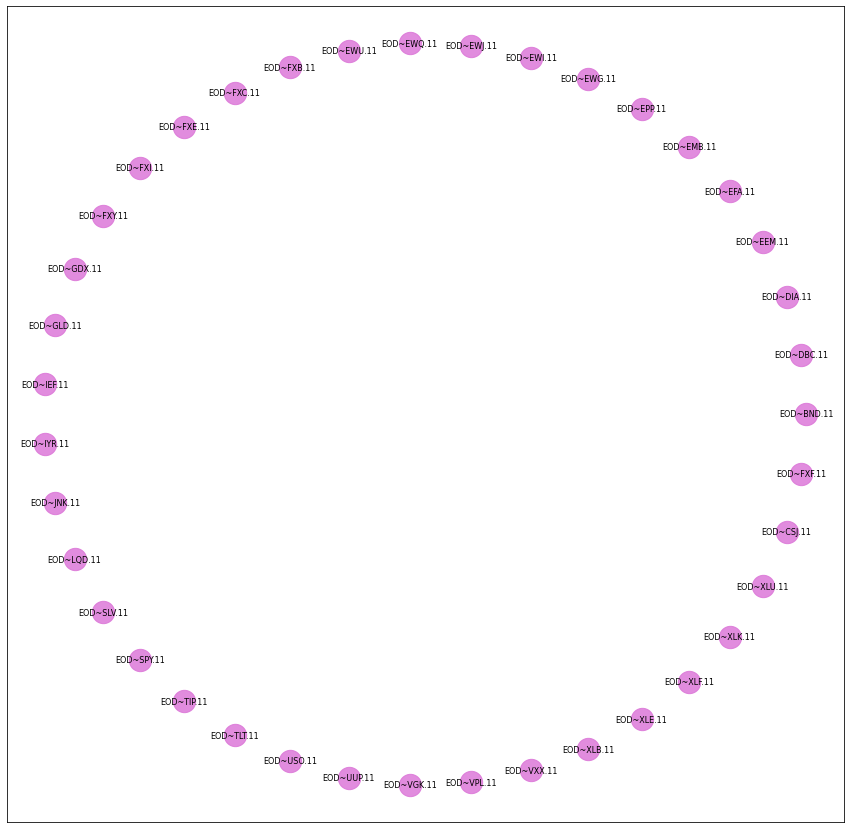

In [5]:
#crates a list for edges and for the weights
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

#positions
positions=nx.circular_layout(G)

#Figure size
plt.figure(figsize=(15,15))

#draws nodes
nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                       node_size=500,alpha=0.8)

#Styling for labels
nx.draw_networkx_labels(G, positions, font_size=8, 
                        font_family='sans-serif')

#draws the edges
nx.draw_networkx_edges(G, positions, edge_list=edges,style='solid')

# displays the graph without axis
plt.axis('off')
#saves image
plt.savefig("part1.png", format="PNG")
plt.show() 

In [ ]:
positions